<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/15week_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/비타민/15주_군집화

/content/drive/MyDrive/비타민/15주_군집화


# K-Means clustering

## 실습1

In [1]:
from sklearn.cluster import KMeans

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [7]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(1000, 2) (1000,)
[0 1 2] [334 333 333]


In [10]:
import pandas as pd
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF

,ftr1,ftr2,target
0,-0.951169,2.719147,2
1,1.736341,4.182702,0
2,-1.505513,3.064642,2
3,-1.192621,2.885867,2
4,-2.330362,2.119329,2
...,...,...,...
995,1.973910,0.913087,1
996,-0.850908,2.377407,2
997,0.740895,0.572806,1
998,-2.331733,2.260642,2


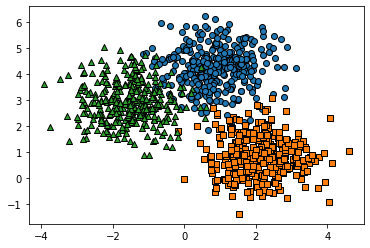

In [15]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
plt.show()

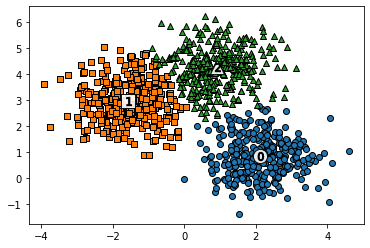

In [16]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

## 실습2 : mall_customer 고객 세분화

In [18]:
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings 
import os
warnings.filterwarnings("ignore")

In [21]:
%ls

15week_clustering.ipynb  Mall_Customers.csv  shopping-data.csv


In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
X1 = df[['Age', 'Spending Score (1-100)']].values

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', n_init = 10, 
                    max_iter = 300, random_state = 111)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

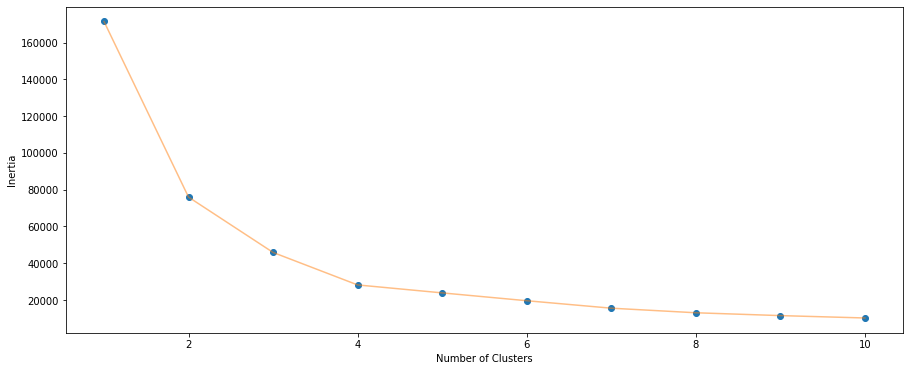

In [26]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

AttributeError: ignored

TypeError: ignored

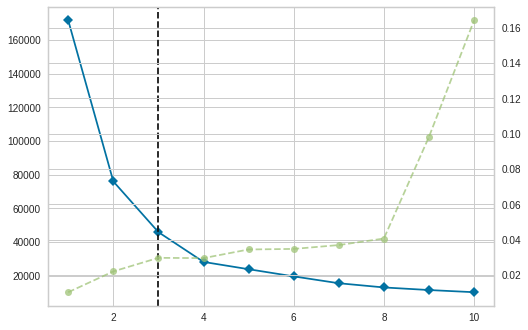

In [28]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init = 'k-means++', n_init = 10, max_iter = 300, random_state = 111)
visualizer = KElbowVisualizer(model, k = (1, 11))
visualizer.fit(X1)

### k = 3

In [29]:
kmeans_1 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 111)
kmeans_1.fit(X1)
labels1 = kmeans_1.labels_
centroids1 = kmeans_1.cluster_centers_

In [31]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans_1.predict(np.c_[xx.ravel(), yy.ravel()])

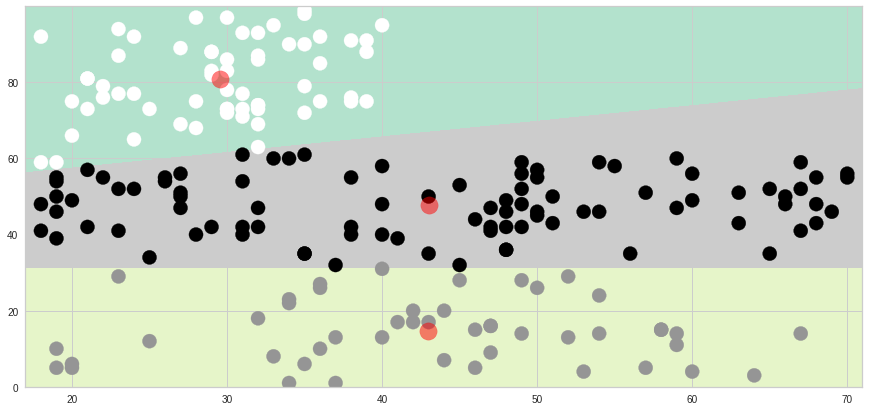

In [33]:
plt.figure(1, figsize = (15, 7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1,
            s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.show()

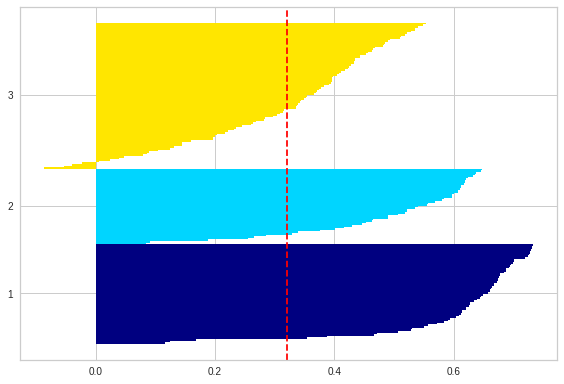

In [35]:
# 실루엣 계수 시각화
from sklearn.metrics import silhouette_samples
from matplotlib import cm

pred_plus = kmeans_1.fit_predict(X1)
cluster_labels = np.unique(pred_plus)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X1, pred_plus, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred_plus == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1, edgecolor = 'none',
             color = color)
    yticks.append((y_ax_upper + y_ax_lower) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(c_silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.tight_layout()
plt.show()

### k = 4

In [38]:
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 111)
kmeans_2.fit(X1)
labels2 = kmeans_2.labels_
centroids2 = kmeans_2.cluster_centers_

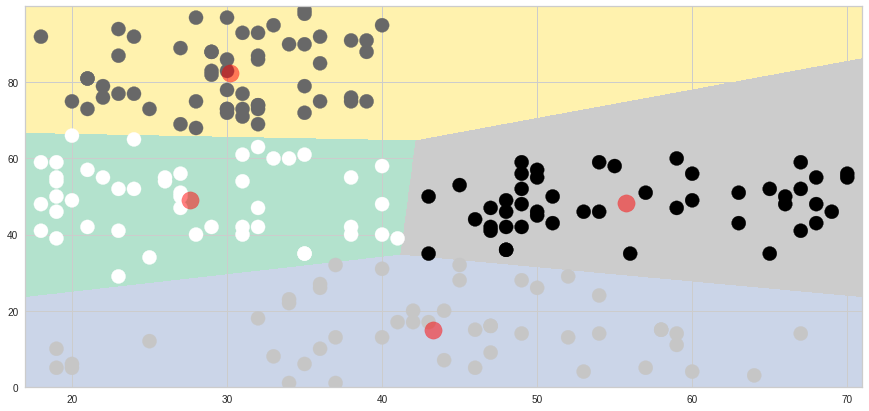

In [39]:
Z = kmeans_2.predict(np.c_[xx.ravel(), yy.ravel()])
plt.figure(1, figsize = (15, 7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels2,
            s = 200)
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.show()

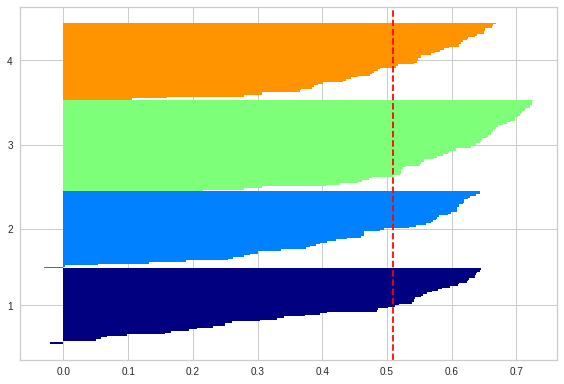

In [40]:
# 실루엣 계수 시각화
from sklearn.metrics import silhouette_samples
from matplotlib import cm

pred_plus = kmeans_2.fit_predict(X1)
cluster_labels = np.unique(pred_plus)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X1, pred_plus, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred_plus == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1, edgecolor = 'none',
             color = color)
    yticks.append((y_ax_upper + y_ax_lower) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(c_silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.tight_layout()
plt.show()

### 클러스터링 결과 2, 3차원으로 시각화

In [41]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

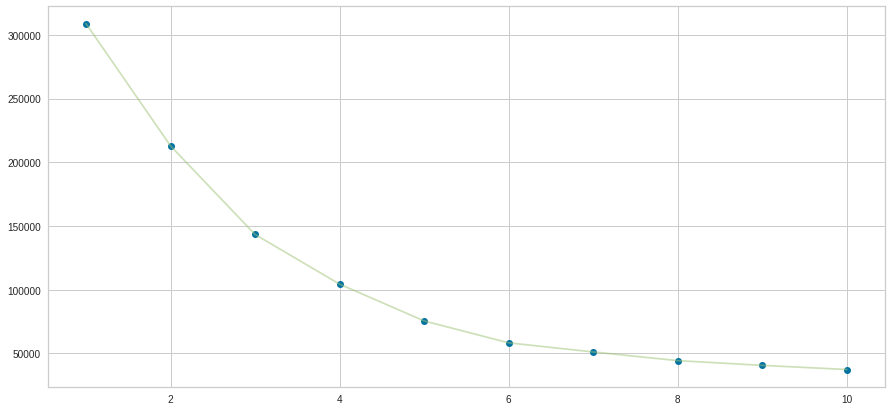

In [42]:
plt.figure(1, figsize = (15, 7))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.show()

In [44]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                    tol=0.0001,  random_state= 111  , algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_


In [45]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = df['label3'],
        size = 5,
        line = dict(
            color = df['label3'],
            width = 12
        ),
        opacity = 0.8
    )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)